Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


Load the Dataset

In [50]:
import os

# Check current working directory
print("📁 Current Directory:", os.getcwd())
print("📄 Files in folder:", os.listdir())

# Load dataset
df = pd.read_csv(r"D:\Project\Different Dataset and Regression Model\rent_data.csv", encoding='latin1', on_bad_lines='skip')
print("✅ Data loaded. Shape:", df.shape)
df.head()


📁 Current Directory: d:\Project\Different Dataset and Regression Model
📄 Files in folder: ['Calgary_Crimes_EDA', 'Gas_Turbine_Regression', 'Rent_Classifieds_EDA', 'rent_data.csv', 'Rent_EDA.ipynb']
✅ Data loaded. Shape: (5918, 1)


,,,,,,,,,id;category;title;body;amenities;bathrooms;bedrooms;currency;fee;has_photo;pets_allowed;price;price_display;price_type;square_feet;address;cityname;state;latitude;longitude;source;time
5668626895;housing/rent/apartment;Studio apartment 2nd St NE,Uhland Terrace NE,Washington,DC 20002;This unit is located at second St NE,Uhland Terrace NE,Washington,DC 20002,Washington,20002,DCMonthly rental rates range from $790 - $109...
5664597177;housing/rent/apartment;Studio apartment 814 Schutte Road;This unit is located at 814 Schutte Road,Evansville,47712,INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent;null;null;1;USD;No;Thumbnail;None;425;$425;Monthly;106;814 Schutte Rd;Evansville;IN;37.9680;-87.6621;RentLingo;1577017063,NaN,NaN,NaN,NaN,NaN,NaN
5659918074;housing/rent/apartment;Studio apartment 1717 12th Ave;This unit is located at 1717 12th Ave,Seattle,98122,WAMonthly rental rates range from $925We have studio units available for rent;null;1;0;USD;No;Thumbnail;None;925;$925;Monthly;116;1717 12th Avenue;Seattle;WA;47.6160;-122.3275;RentLingo;1576667743,NaN,NaN,NaN,NaN,NaN,NaN
5668626759;housing/rent/apartment;Studio apartment Washington Blvd,N Cleveland St,Arlington;This unit is located at Washington Blvd,N Cleveland St,Arlington,Arlington,22201,VAMonthly rental rates range from $880We have studio units available for rent;null;null;0;USD;No;Thumbnail;None;880;$880;Monthly;125;null;Arlington;VA;38.8738;-77.1055;RentLingo;1577359401,NaN,NaN
5668627426;housing/rent/apartment;Studio apartment 2432 Penmar Ave;This unit is located at 2432 Penmar Ave,Venice,90291,CAMonthly rental rates range from $1800We have studio units available for rent;null;null;0;USD;No;Thumbnail;None;1800;$1,800;Monthly;132;2432 Penmar Avenue;Venice;CA;33.9932;-118.4609;RentLingo;1577359461,NaN,NaN,NaN,NaN,NaN


Understand the Dataset (Basic Stats and Data Info)

In [51]:
df.info() # Check for missing values
df.describe()
# Check for missing values

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5918 entries, ('5668626895;housing/rent/apartment;Studio apartment 2nd St NE', ' Uhland Terrace NE', ' Washington', ' DC 20002;This unit is located at second St NE', ' Uhland Terrace NE', ' Washington', ' DC 20002', ' Washington', ' 20002') to ('5668643292;housing/rent/apartment;Six BR 9908 Bentcross Drive;This unit is located at 9908 Bentcross Drive', ' Potomac', ' 20854', ' MDMonthly rental rates range from $11000We have 6 beds units available for rent;null;8.5;6;USD;No;Thumbnail;None;11000;$11', '000;Monthly;11318;9908 Bentcross Dr;Potomac;MD;39.0287;-77.2409;RentLingo;1577360560', nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                 

,id;category;title;body;amenities;bathrooms;bedrooms;currency;fee;has_photo;pets_allowed;price;price_display;price_type;square_feet;address;cityname;state;latitude;longitude;source;time
count,361
unique,361
top,499;Monthly;3264;2716 King Arthur CT;Buford;GA...
freq,1


Handle Missing Values (Check null, Drop or Replace Null)

In [52]:
df.isnull().sum()


id;category;title;body;amenities;bathrooms;bedrooms;currency;fee;has_photo;pets_allowed;price;price_display;price_type;square_feet;address;cityname;state;latitude;longitude;source;time    5557
dtype: int64

In [53]:
df.columns = df.columns.str.strip().str.lower()


In [54]:
print(df.columns.tolist())


['id;category;title;body;amenities;bathrooms;bedrooms;currency;fee;has_photo;pets_allowed;price;price_display;price_type;square_feet;address;cityname;state;latitude;longitude;source;time']


In [55]:
df = df.dropna(subset=['price', 'square_feet', 'bedrooms'])  # Drop rows where key values are missing
df['has_photo'] = df['has_photo'].fillna(0)  # If Photos column exists


KeyError: ['price', 'square_feet', 'bedrooms']

Analysis Question: Size Vrs Rent

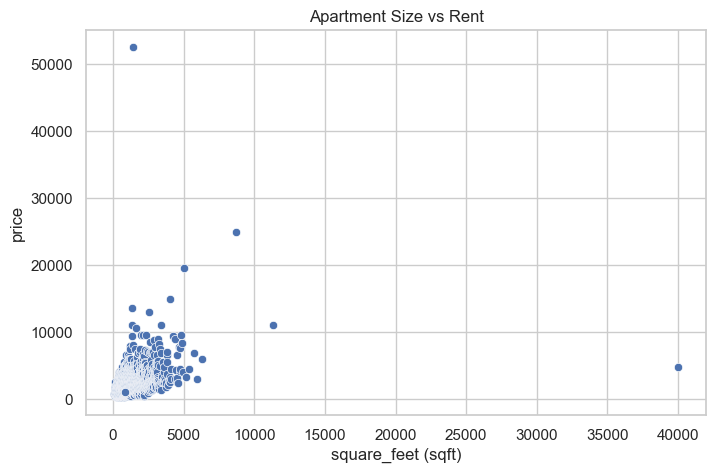

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='square_feet', y='price', data=df)
plt.title('Apartment Size vs Rent')
plt.xlabel('square_feet (sqft)')
plt.ylabel('price')
plt.show()


Bedrooms Vrs Rent

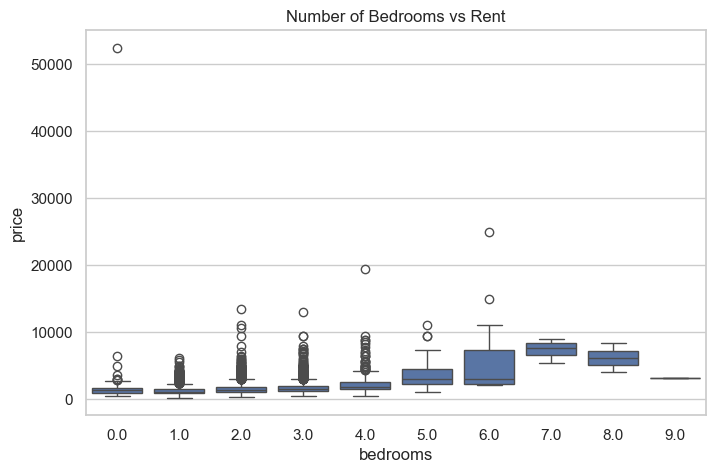

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Number of Bedrooms vs Rent')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()


Average Price by Bedroom Count

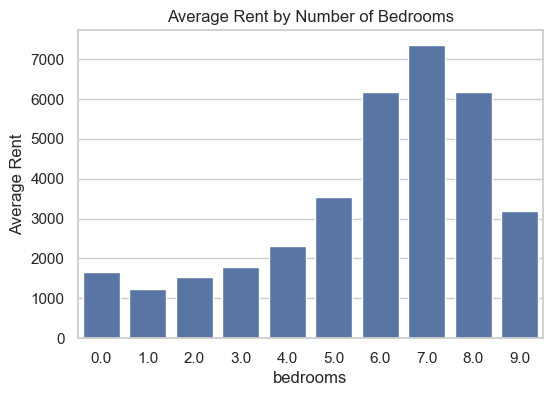

In [ ]:
avg_price = df.groupby('bedrooms')['price'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='bedrooms', y='price', data=avg_price)
plt.title('Average Rent by Number of Bedrooms')
plt.ylabel('Average Rent')
plt.show()


Photo Impact On Rent

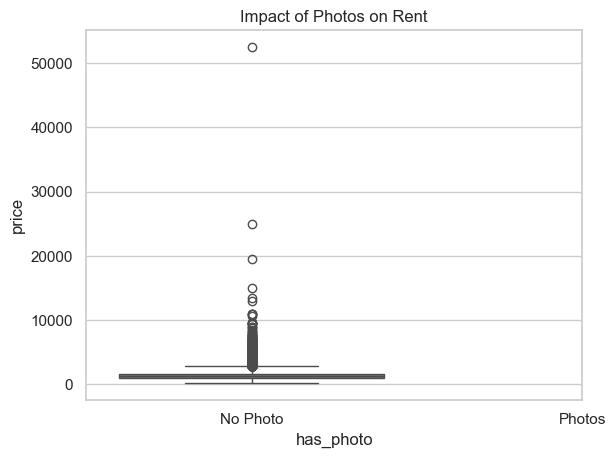

In [ ]:
df['has_photo'] = df['has_photo'].apply(lambda x: 1 if x != 0 else 0)

sns.boxplot(x='has_photo', y='price', data=df)
plt.xticks([0, 1], ['No Photo', 'Photos'])
plt.title('Impact of Photos on Rent')
plt.show()


Pets Allowed Vrs Not Allowed

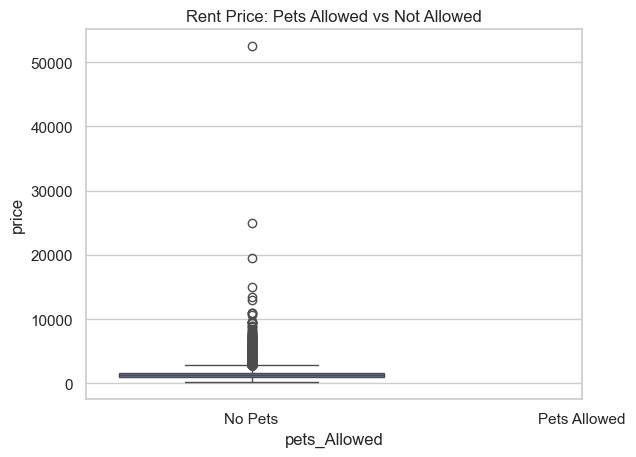

In [ ]:
df['pets_Allowed'] = df['source'].str.contains("pet|dog|cat", case=False, na=False).astype(int)

sns.boxplot(x='pets_Allowed', y='price', data=df)
plt.xticks([0, 1], ['No Pets', 'Pets Allowed'])
plt.title('Rent Price: Pets Allowed vs Not Allowed')
plt.show()


### Relationship between Apartment Size and Rent
We observe a positive correlation — larger apartments tend to cost more, but there is a lot of variation due to location, amenities, etc.
